## Import Libraries

In [261]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')

## Reading Dataset And Get Info


In [262]:
df = pd.read_csv('heart_corrupted.csv')
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1738,49,Female,ASY,138,228,0,Normal,107,Yes,1.5,Flat,1
725,55,F,ASY,180,327,0,ST,117,Y,3.4,Flat,1
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1154,51,F,ASY,159,302,0,Normal,150,Y,1.0,Flat,1
2157,55,Male,ASY,132,354,0,Normal,132,Yes,1.2,Flat,1


In [263]:
# Show Shape of Data
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")

Number of Row : 2870
Number of Columns : 12


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2870 non-null   object 
 1   Sex             2787 non-null   object 
 2   ChestPainType   2870 non-null   object 
 3   RestingBP       2786 non-null   object 
 4   Cholesterol     2776 non-null   object 
 5   FastingBS       2870 non-null   int64  
 6   RestingECG      2870 non-null   object 
 7   MaxHR           2788 non-null   object 
 8   ExerciseAngina  2870 non-null   object 
 9   Oldpeak         2870 non-null   float64
 10  ST_Slope        2870 non-null   object 
 11  HeartDisease    2870 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 269.2+ KB


In [265]:
# Check NaN Value
df.isna().sum()

Age                0
Sex               83
ChestPainType      0
RestingBP         84
Cholesterol       94
FastingBS          0
RestingECG         0
MaxHR             82
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

In [266]:
df.dtypes

Age                object
Sex                object
ChestPainType      object
RestingBP          object
Cholesterol        object
FastingBS           int64
RestingECG         object
MaxHR              object
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

All columns are catogries.!!

In [267]:
# Describe 
df.describe()

,FastingBS,Oldpeak,HeartDisease
count,2870.000000,2870.000000,2870.000000
mean,0.296167,1.149303,0.854704
std,0.456645,1.061962,0.352461
min,0.000000,-2.600000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,1.100000,1.000000
75%,1.000000,1.800000,1.000000
max,1.000000,6.200000,1.000000


In [268]:
pd.DataFrame({'Count':df.shape[0],
              'Null':df.isnull().sum(),
              'Null %':df.isnull().mean() * 100,
              'Cardinality':df.nunique()
})

,Count,Null,Null %,Cardinality
Age,2870,0,0.000000,149
Sex,2870,83,2.891986,7
ChestPainType,2870,0,0.000000,4
RestingBP,2870,84,2.926829,106
Cholesterol,2870,94,3.275261,294
FastingBS,2870,0,0.000000,2
RestingECG,2870,0,0.000000,3
MaxHR,2870,82,2.857143,133
ExerciseAngina,2870,0,0.000000,4
Oldpeak,2870,0,0.000000,69


In [269]:
# Check Dublication
df.duplicated().sum()

np.int64(54)

There are many and many issues in the data.
* Change `Age`, `RestingBP`, `MaxHR` and `Cholesterol` columns' type to integer .
* Handle inconsistent formats.
* Handle missng data.
* Handle outliers.
* Check about non realistic values in `RestingBP`, `Cholesterol`, and `Oldpeak` columns.
* Remove duplicated data


## Data Cleaning 


#### Age Column

In [270]:
df['Age'].unique()

array(['40', '49', '37', '48', '54', '39', '45', '58', '42', '38', '43',
       '60', '36', '44', '53', '52', '51', '56', '54 yr', '41', '32',
       '65', '35', '590', '50', '47', '31', '46 yr', '32 years', '57 yr',
       '44 year', '55', '46', '550', '63', '66', '48 y', '57', '34', '59',
       '33', '580', '61', '500', '29', '43 years', '41 yr', '62', '490',
       '28', '30', '410', '50 yr', '510', '570', '74', '68', '38 years',
       '72', '64', '69', '55 years', '67', '73', '70', '53 years',
       '65 years', '62 years', '54 y', '77', '40 years', '560', '75',
       '630', '76', '71', '380', '58 y', '610', '54 years', '44 years',
       '60 yr', '61 y', '54 year', '60 y', '66 y', '52 years', '450',
       '670', '620', '600', '430', '56 year', '58 years', '59 yr', '59 y',
       '420', '50 year', '61 years', '650', '59 years', '56 years',
       '60 years', '56 y', '470', '60 year', '61 yr', '62 year', '46 y',
       '65 year', '50 years', '700', '39 years', '48 years', '47 y'

Mmm! Let's remove non-numeric suffixes like `67 years` `63 y` , convert values to integer, and handle outliers like `690` and so on.

In [271]:
df['Age'] = df['Age'].str.replace(r'\s*(years?|yrs?|y)\s*', '', regex=True)

In [272]:
df['Age'].unique()

array(['40', '49', '37', '48', '54', '39', '45', '58', '42', '38', '43',
       '60', '36', '44', '53', '52', '51', '56', '41', '32', '65', '35',
       '590', '50', '47', '31', '46', '57', '55', '550', '63', '66', '34',
       '59', '33', '580', '61', '500', '29', '62', '490', '28', '30',
       '410', '510', '570', '74', '68', '72', '64', '69', '67', '73',
       '70', '77', '560', '75', '630', '76', '71', '380', '610', '450',
       '670', '620', '600', '430', '420', '650', '470', '700', '390',
       '330', '660', '530', '730', '680', '400', '690', '520'],
      dtype=object)

In [273]:
df['Age'] = df['Age'].astype(int)

Let's remove outliers.

If you notice that all outliers values end with a `0` so all we do is dividing those values by 10.
(the reason of outliers is the some values is multiplied by 10)

In [274]:
df['Age'] = df['Age'].apply(lambda x: x // 10 if x > 100 and x % 10 == 0 else x)

In [275]:
df['Age'].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

#### Sex Column

In [276]:
df['Sex'].value_counts()

Sex
M            1445
Male          949
F             192
Female        140
undefined      26
##             22
??             13
Name: count, dtype: int64

It seems so dirty. Let's normalize values to consistent format and replace `##`, `undefined` and `??` values with NaN


In [277]:
df['Sex'] = df['Sex'].replace({'M': 'Male', 'F': 'Female'})

In [278]:
df['Sex'] = df['Sex'].apply(lambda x: np.nan if x in ['##', 'undefined', '??'] else x)

In [164]:
df['Sex'].unique()

array(['Male', 'Female', nan], dtype=object)

In [279]:
df['Sex'].isna().sum() / df.shape[0] * 100

np.float64(5.017421602787456)

#### RestingBP, MaxHR and Cholesterol Columns

In [280]:
df['RestingBP'].unique()

array(['140', '160', '130', '138', '150', '120', nan, '136', '115', '110',
       '100', '124', '113', '125', '145', '112', '132', '118', '170',
       '##', '190', '135', '180', '108', '155', '128', '106', '92', '??',
       '200', '122', '98', '105', '133', '95', '80', '137', '185', '165',
       '142', '126', '152', '116', '0', '144', '154', '134', '104', '139',
       '141', '131', '178', '146', '158', '123', '102', '96', 'undefined',
       '143', '172', '156', '114', '127', '101', '174', '94', '148',
       '117', '129', '164', '171', '119', '175', '121', '157', '147',
       '111', '153', '191', '109', '169', '162', '149', '103', '195',
       '167', '107', '159', '166', '161', '179', '97', '168', '163', '99',
       '151', '197', '199', '173', '177', '196', '186', '183', '176',
       '23', '189', '181'], dtype=object)

In [281]:
df['Cholesterol'].dtype, df['RestingBP'].dtype, df['MaxHR'].dtype

(dtype('O'), dtype('O'), dtype('O'))

Change to integers numbers.

In [282]:
df['RestingBP'] = pd.to_numeric(df['RestingBP'], errors='coerce').astype('Int64')
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'], errors='coerce').astype('Int64')
df['MaxHR'] = pd.to_numeric(df['MaxHR'], errors='coerce').astype('Int64')

In [283]:
df['RestingBP'].isna().sum()

np.int64(144)

#### ExerciseAngina Column

In [284]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
Y      985
N      737
Yes    654
No     494
Name: count, dtype: int64

In [285]:
df['ExerciseAngina'] = df['ExerciseAngina'].replace({'N': 'No', 'Y': 'Yes'})

In [286]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Male,ATA,140,289,0,Normal,172,No,0.0,Up,0
1,49,Female,NAP,160,180,0,Normal,156,No,1.0,Flat,1
2,37,Male,ATA,130,283,0,ST,98,No,0.0,Up,0
3,48,Female,ASY,138,<NA>,0,Normal,108,Yes,1.5,Flat,1
4,54,Male,NAP,150,195,0,Normal,122,No,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2865,29,Male,ATA,140,263,0,Normal,170,No,0.0,Up,0
2866,52,Male,ASY,125,212,0,Normal,168,No,1.0,Up,1
2867,49,Male,ASY,140,234,0,Normal,140,Yes,1.0,Flat,1
2868,53,Male,ASY,110,231,0,Normal,159,No,0.0,Up,1


In [287]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           Int64
Cholesterol         Int64
FastingBS           int64
RestingECG         object
MaxHR               Int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

**Handle not realistic value (RestingBP, Cholesterol,Oldpeak)**

####    All this an errors in data collection
- the min value in  2 columns = 0 (RestingBP, Cholesterol) is not realistic
- An Oldpeak value of -2.6 mm is not realistic because ST depression (Oldpeak) cannot be negative

In [288]:
print((df['Oldpeak'] < 0).sum())

49


In [289]:
df[df['Oldpeak']<0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,Male,ASY,100,0,1,Normal,109,No,-0.9,Flat,1
324,46,Male,ASY,100,<NA>,1,ST,133,No,-2.6,Flat,1
325,42,Male,ASY,105,<NA>,1,Normal,128,Yes,-1.5,Down,1
326,45,Male,NAP,110,0,0,Normal,138,No,-0.1,Up,0
331,56,Male,ASY,115,0,1,ST,82,No,-1.0,Up,1
332,38,Male,NAP,100,0,0,Normal,179,No,-1.1,Up,0
334,51,Male,ASY,130,0,1,Normal,170,No,-0.7,Up,1
335,62,Male,TA,120,0,1,LVH,134,No,-0.8,Flat,1
352,56,NaN,ASY,120,0,0,ST,100,Yes,-1.0,Down,1
407,62,Male,ASY,115,0,1,Normal,72,Yes,-0.5,Flat,1


There are 49 neg value. we will change it to pos. The negative reviews are real but were entered incorrectly because Oldpeak should be positive

In [290]:
# Change negative values to positive values
df['Oldpeak'] = df['Oldpeak'].abs()

Convert those 0's values in these 2 columns (RestingBP, Cholesterol) to determine how many missing valuesin each feature in our data

In [291]:
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,Male,ASY,115,0,0,Normal,93,Yes,0.0,Flat,1
294,32,Male,TA,95,0,1,Normal,127,No,0.7,Up,1
295,61,Male,ASY,105,0,1,Normal,110,Yes,1.5,Up,1
296,50,Male,ASY,145,0,1,Normal,139,Yes,0.7,Flat,1
297,57,Male,ASY,110,0,1,ST,131,Yes,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2858,61,Male,NAP,120,0,0,Normal,80,Yes,0.0,Flat,1
2860,38,Male,NAP,115,0,0,Normal,128,Yes,0.0,Flat,1
2861,59,Male,ASY,125,0,1,ST,130,Yes,1.2,Down,1
2863,55,Male,ASY,140,0,0,Normal,83,No,0.0,Flat,1


In [292]:
len(df[df['Cholesterol'] == 0]), len(df[df['RestingBP'] == 0])

(702, 1)

In [293]:
df[['RestingBP','Cholesterol']] = df[['RestingBP','Cholesterol']].replace(0,np.nan)

In [294]:
df[['RestingBP','Cholesterol']].isna().sum()

RestingBP      145
Cholesterol    846
dtype: int64

In [295]:
df.shape

(2870, 12)

## Detection Outliers

In [296]:
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

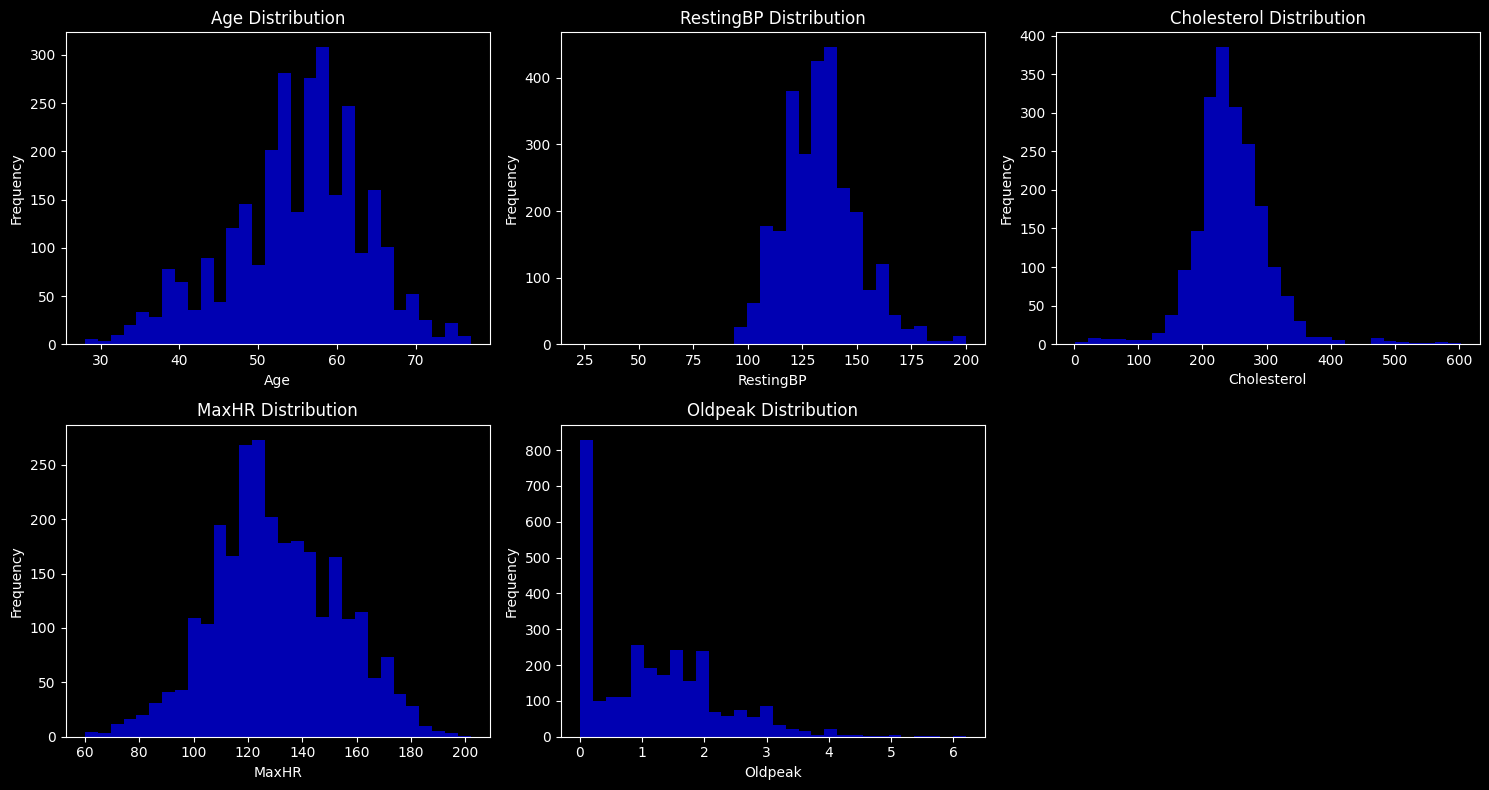

In [297]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

There are outliers in oldpeak and Cholesterol columns. we will drop them.

In [298]:
cholesterol_mean = df[(df['Cholesterol'] >= 100) & (df['Cholesterol'] <= 400)]['Cholesterol'].mean()

# Replace outliers with the mean
df['Cholesterol'] = df['Cholesterol'].apply(
    lambda x: cholesterol_mean if x < 100 or x > 400 else x
)

In [299]:
oldpeak_mean = df[df['Oldpeak'] <= 4]['Oldpeak'].mean()

# Replace outliers with the mean
df['Oldpeak'] = df['Oldpeak'].apply(
    lambda x: oldpeak_mean if x > 4 else x
)

In [300]:
df.shape

(2870, 12)

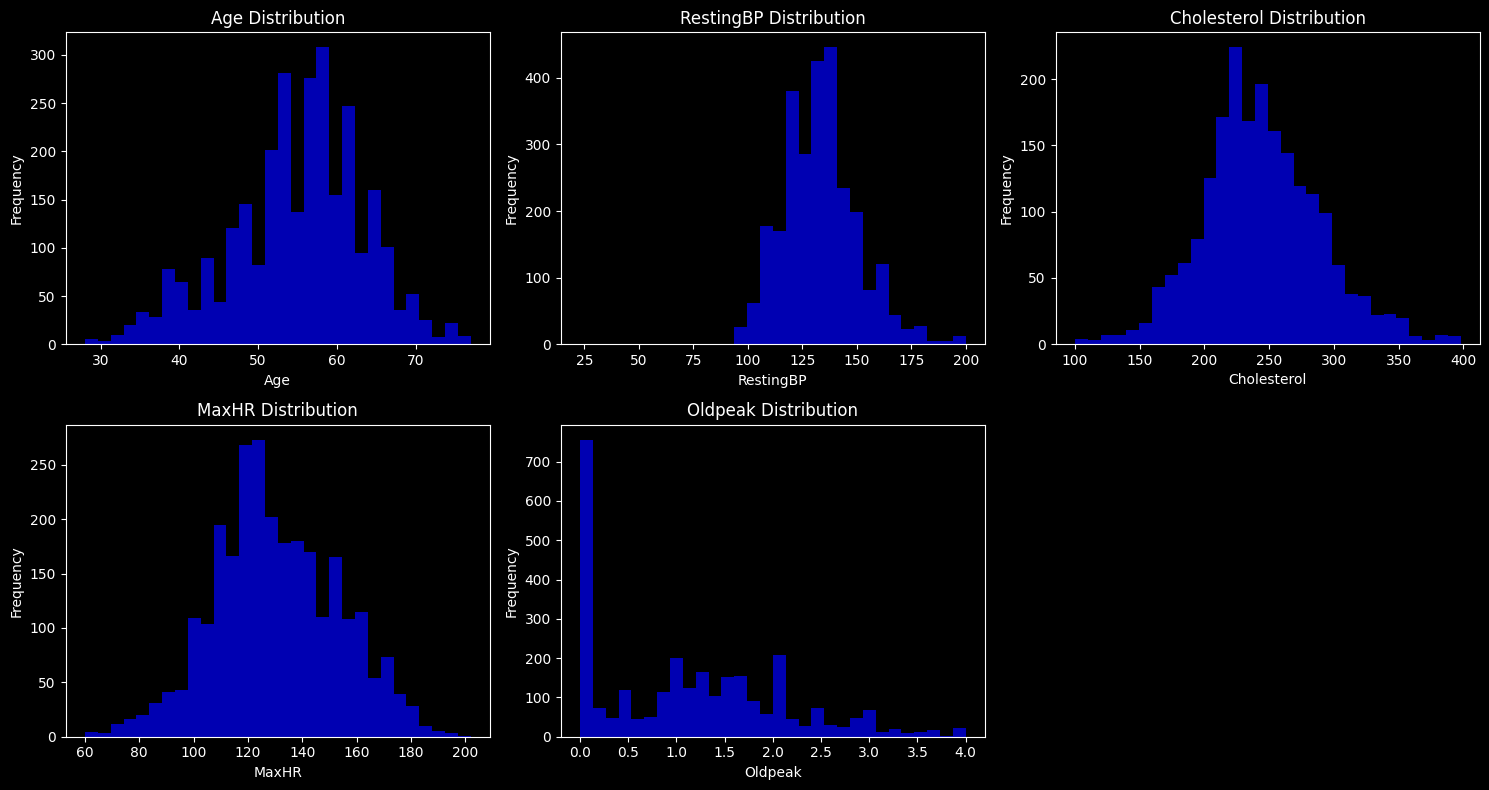

In [301]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## EDA of Data and Get Insights

**Heart Disease Distribution**

In [240]:
patient_counts = df['HeartDisease'].value_counts()
patient_counts

HeartDisease
1    2453
0     417
Name: count, dtype: int64

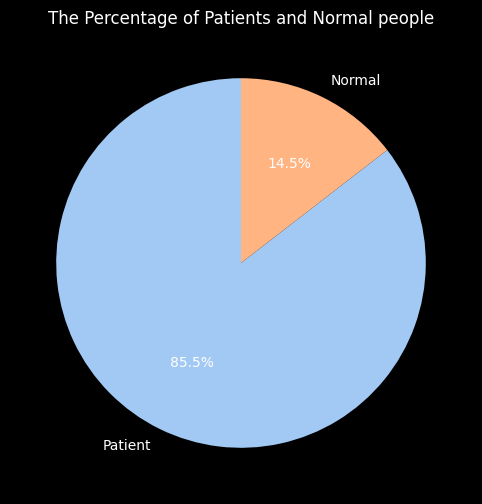

In [244]:
plt.figure(figsize=(8, 6))
plt.pie(patient_counts, 
        labels=['Patient', 'Normal'], 
        autopct='%.1f%%',
        colors=sns.color_palette('pastel'),
        startangle=90)

plt.title('The Percentage of Patients and Normal people')
plt.show()

**Age distribution**

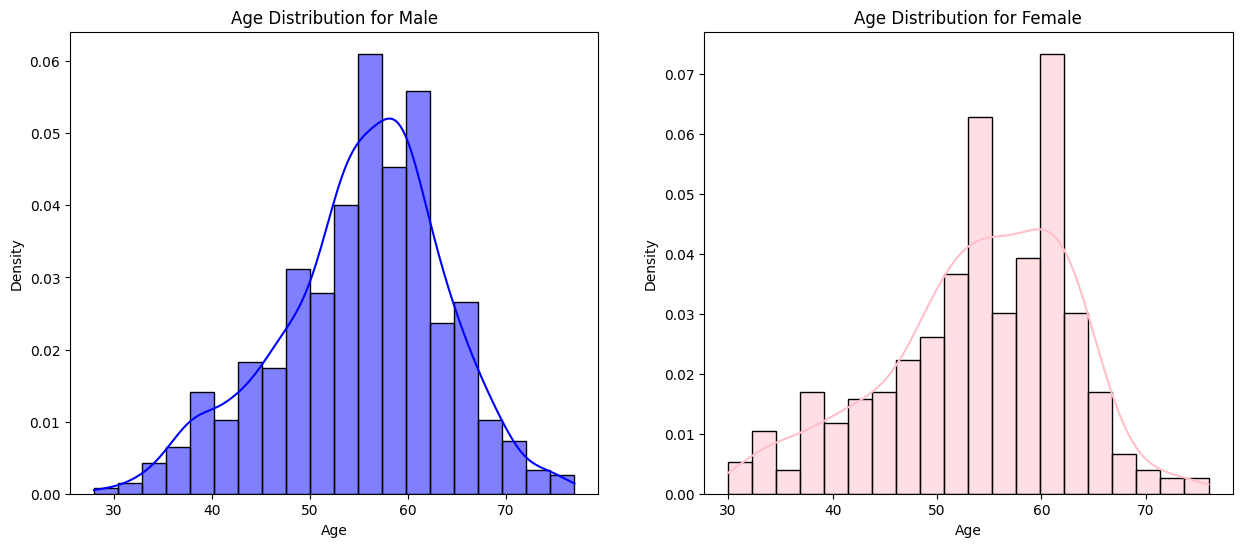

In [203]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(df[df['Sex'] == 'Male']['Age'], color='blue', kde=True, bins=20, stat='density')
plt.title('Age Distribution for Male')

plt.subplot(1,2,2)
sns.histplot(df[df['Sex'] == 'Female']['Age'], color='pink', kde=True, bins=20, stat='density')
plt.title('Age Distribution for Female')

plt.show()

- Most Ranges of Age between 50 to 60 

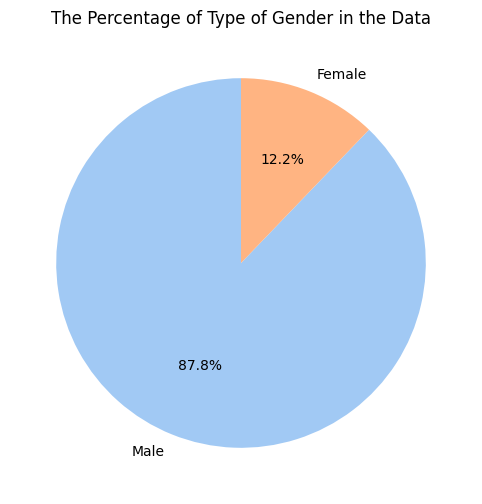

In [204]:
gender_counts = df['Sex'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, 
        labels=['Male', 'Female'], 
        autopct='%.1f%%',
        colors=sns.color_palette('pastel'),
        startangle=90)

plt.title('The Percentage of Type of Gender in the Data')
plt.show()

- Males are the dominant Category in the data

Chest Pain Type For each gender of Sex

In [218]:
pain_counts_long = df.groupby(['ChestPainType', 'Sex']).size().reset_index(name='Count')
pain_counts_long

,ChestPainType,Sex,Count
0,ASY,Female,186
1,ASY,Male,1811
2,ATA,Female,68
3,ATA,Male,139
4,NAP,Female,66
5,NAP,Male,363
6,TA,Female,12
7,TA,Male,81


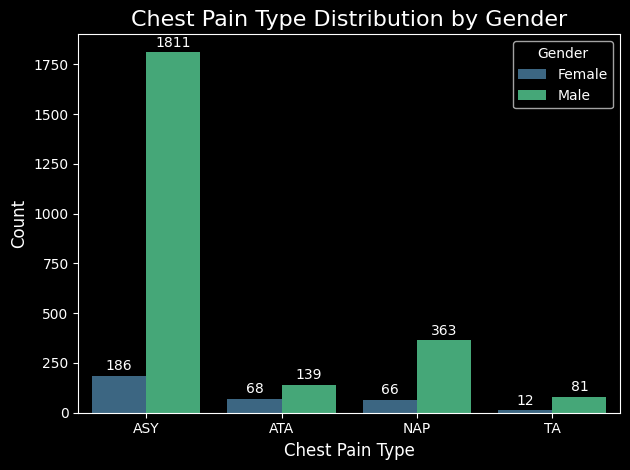

In [219]:
ax = sns.barplot(data=pain_counts_long, x='ChestPainType', y='Count', hue='Sex', palette='viridis', ci=None)

plt.title('Chest Pain Type Distribution by Gender', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, fontsize=10)

ax.legend(title='Gender')

plt.tight_layout()
plt.show()

Most Chest Pain Type 
- Male and Female Most Common occur -> ASY: Asymptomatic
- Male and Female Least Common occur -> TA: Typical Angina

**Distribution of Resting Blood Pressure**

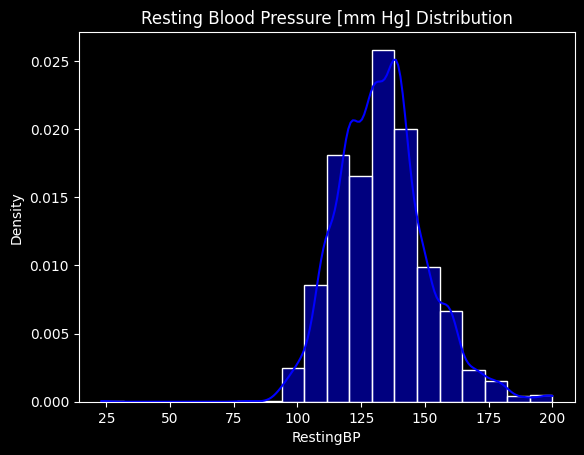

In [221]:
sns.histplot(df['RestingBP'], color='blue', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure [mm Hg] Distribution');


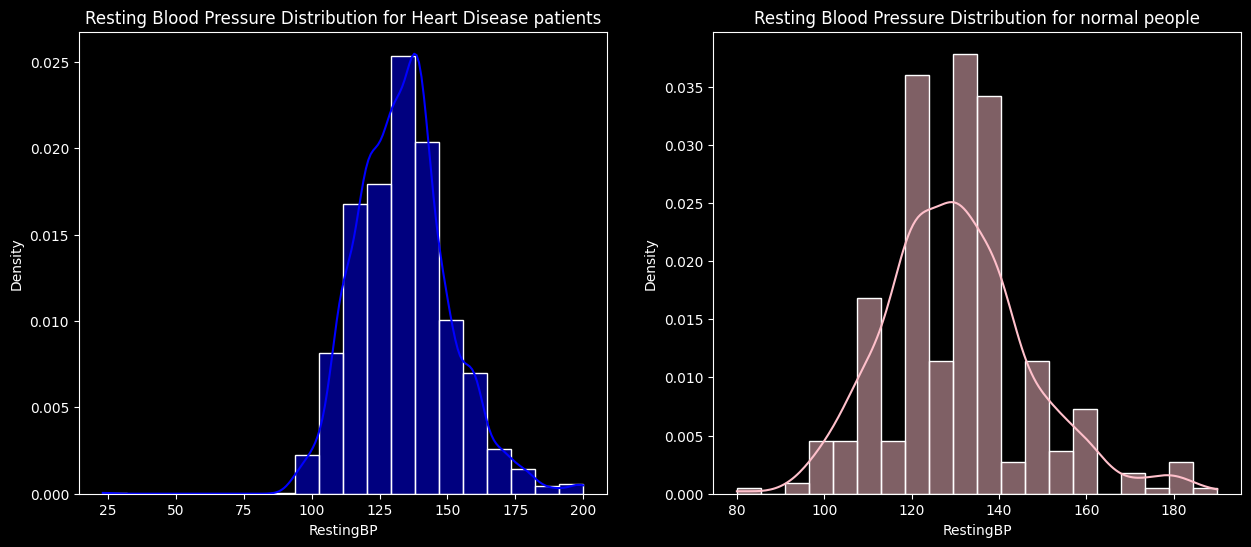

In [227]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)

sns.histplot(df[df['HeartDisease'] == 1]['RestingBP'], color='blue', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure Distribution for Heart Disease patients')

plt.subplot(1,2,2)

sns.histplot(df[df['HeartDisease'] == 0]['RestingBP'], color='pink', kde=True, bins=20, stat='density')
plt.title('Resting Blood Pressure Distribution for normal people')

plt.show()

**Distribution of Cholesterol**

<Figure size 1500x600 with 0 Axes>

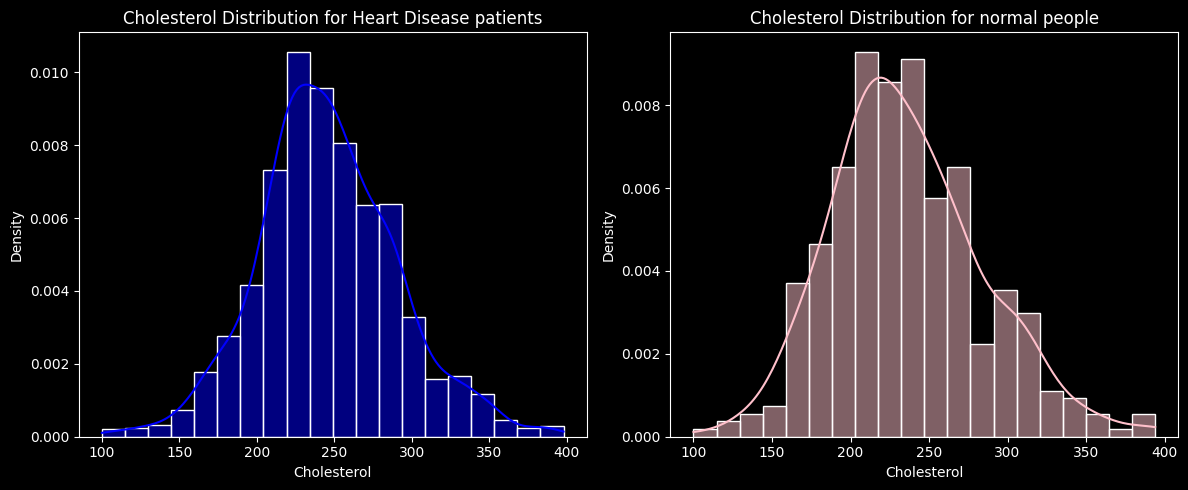

In [234]:
plt.figure(figsize=(15, 6))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df['HeartDisease'] == 1]['Cholesterol'], color='blue', kde=True, bins=20, stat='density', ax=axes[0])
axes[0].set_title('Cholesterol Distribution for Heart Disease patients')

sns.histplot(df[df['HeartDisease'] == 0]['Cholesterol'], color='pink', kde=True, bins=20, stat='density', ax=axes[1])
axes[1].set_title('Cholesterol Distribution for normal people')

plt.tight_layout()
plt.show()

Percentage of fasting For people has heart disease or not


معناه السكر فالدم ف الصيام 



In [230]:
df['FastingBS'].unique()

array([0, 1])

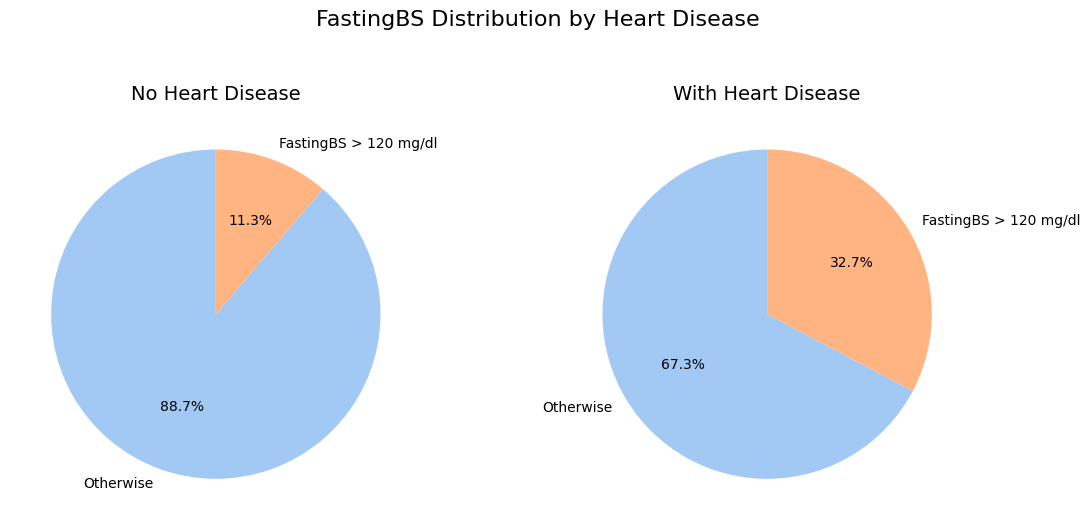

In [231]:
no_hd = df[df['HeartDisease'] == 0]['FastingBS'].value_counts()
yes_hd = df[df['HeartDisease'] == 1]['FastingBS'].value_counts()

labels = ['Otherwise', 'FastingBS > 120 mg/dl']
colors = sns.color_palette('pastel')[0:2]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), facecolor='white')

axes[0].pie(
    no_hd,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'color': 'black'}
)
axes[0].set_title('No Heart Disease', fontsize=14, color='black')

axes[1].pie(
    yes_hd,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    textprops={'color': 'black'}
)
axes[1].set_title('With Heart Disease', fontsize=14, color='black')

plt.suptitle('FastingBS Distribution by Heart Disease', fontsize=16, color='black', y=1.05)
plt.tight_layout()
plt.show()


A higher rate of fasting affects the appearance of heart disease in people

Distribution of Maximum Heart Rate Achieved (MaxHR)

قيم MaxHR المنخفضة أثناء المجهود البدني قد تشير إلى وجود مشاكل في القلب

<Figure size 1500x600 with 0 Axes>

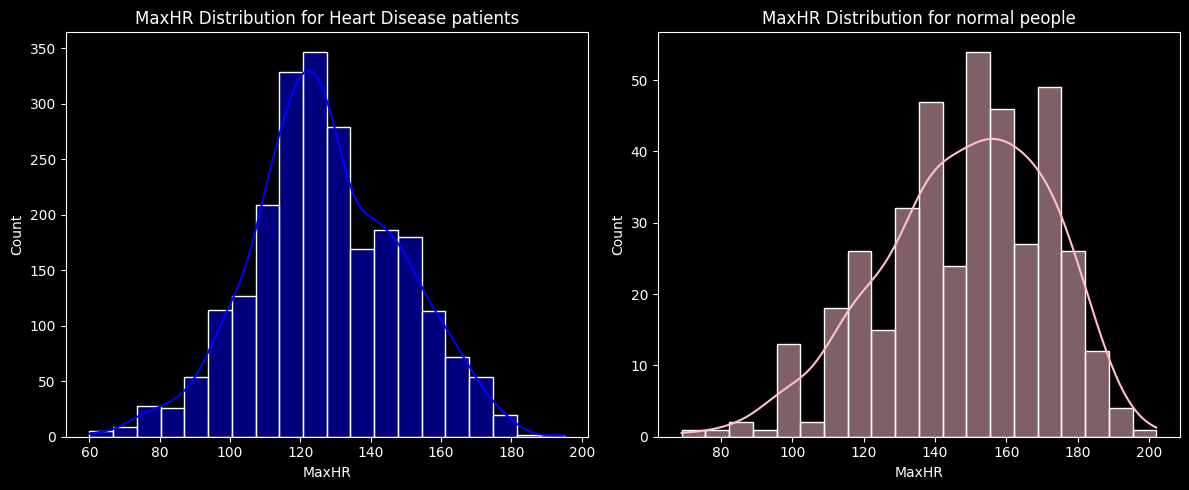

In [238]:
plt.figure(figsize=(15, 6))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df['HeartDisease'] == 1]['MaxHR'], color='blue', kde=True, bins=20, ax=axes[0])
axes[0].set_title('MaxHR Distribution for Heart Disease patients')

sns.histplot(df[df['HeartDisease'] == 0]['MaxHR'], color='pink', kde=True, bins=20, ax=axes[1])
axes[1].set_title('MaxHR Distribution for normal people')

plt.tight_layout()
plt.show();

Oldpeak for people has Heart Disease or not

* Oldpeak = 0.0: No ST depression → likely normal
* Oldpeak > 0  : ST segment dropped 1.4 mV → heart disease.

<Figure size 1500x600 with 0 Axes>

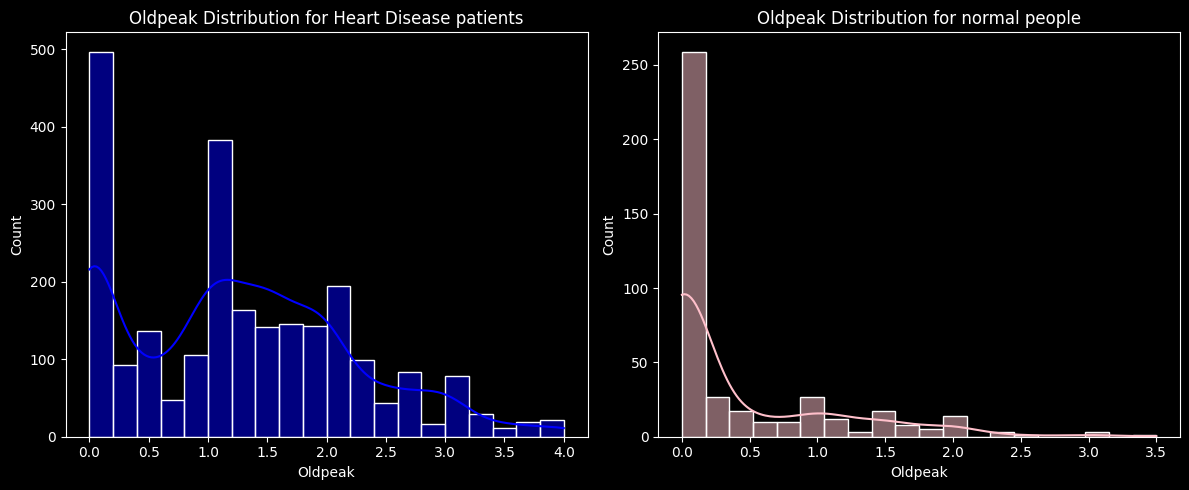

In [239]:
plt.figure(figsize=(15, 6))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df[df['HeartDisease'] == 1]['Oldpeak'], color='blue', kde=True, bins=20, ax=axes[0])
axes[0].set_title('Oldpeak Distribution for Heart Disease patients')

sns.histplot(df[df['HeartDisease'] == 0]['Oldpeak'], color='pink', kde=True, bins=20, ax=axes[1])
axes[1].set_title('Oldpeak Distribution for normal people')

plt.tight_layout()
plt.show();

Higher Oldpeak values are strongly correlated with the presence of Heart Disease

## Total Insights
- 85% of peoplein data have heart disease.
- Most Ranges of Age between 50 to 60 
- Males are the dominant Category in the data
- Male and Female Most Common occur -> ASY: Asymptomatic
- Male and Female Least Common occur -> TA: Typical Angina
- A higher rate of fasting affects the appearance of heart disease in people
- Higher Oldpeak values are strongly correlated with the presence of Heart Disease

## Data Preprocessing

In [251]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Male,ATA,140,289.0,0,Normal,172,No,0.0,Up,0
1,49,Female,NAP,160,180.0,0,Normal,156,No,1.0,Flat,1
2,37,Male,ATA,130,283.0,0,ST,98,No,0.0,Up,0
3,48,Female,ASY,138,NaN,0,Normal,108,Yes,1.5,Flat,1
4,54,Male,NAP,150,195.0,0,Normal,122,No,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2865,29,Male,ATA,140,263.0,0,Normal,170,No,0.0,Up,0
2866,52,Male,ASY,125,212.0,0,Normal,168,No,1.0,Up,1
2867,49,Male,ASY,140,234.0,0,Normal,140,Yes,1.0,Flat,1
2868,53,Male,ASY,110,231.0,0,Normal,159,No,0.0,Up,1


In [252]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           Int64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               Int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [323]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (StandardScaler, OneHotEncoder, 
                                 OrdinalEncoder, PolynomialFeatures,
                                 FunctionTransformer)

from sklearn.metrics import accuracy_score, f1_score, precision_score

In [303]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
binary_categorical = ['Sex', 'FastingBS', 'ExerciseAngina']
multiclass_categorical = ['ChestPainType', 'RestingECG', 'ST_Slope']
target_col = 'HeartDisease'

In [304]:
X = df.drop(columns=[target_col])
y = df[target_col]

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
'''
fill_columns = {
    'Sex': ['ChestPainType', 'ExerciseAngina'],
    'MaxHR': ['Age', 'Sex'],
    'Cholesterol': ['Age', 'Sex', 'FastingBS']
}


def fillna_general(df, target_column, feature_columns):
    grouped_dict = df.groupby(feature_columns)[target_column].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    ).to_dict()

    df.loc[df[target_column].isna(), target_column] = (
        df[df[target_column].isna()]
        .apply(lambda row: grouped_dict.get(
            tuple(row[f] for f in feature_columns), np.nan), axis=1)
    )
    return df

class FillNaNTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, col_to_fill, ref_cols):
        self.col_to_fill = col_to_fill
        self.ref_cols = ref_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for col, refs in zip(self.col_to_fill, self.ref_cols):
            X = fillna_general(X, col, refs)
        return X
    '''

In [312]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

bin_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary', sparse_output=False))
])

multi_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num',   num_pipeline,    numerical_cols),
    ('bin',   bin_pipeline,    binary_categorical),
    ('multi', multi_pipeline,  multiclass_categorical)
], remainder='drop')

final_pipeline = Pipeline([
    #('fillna', FillNaNTransformer(
    #   col_to_fill=list(fill_columns.keys()),
    #   ref_cols=list(fill_columns.values()))
    #),
    ('preprocessor', preprocessor)
])

In [313]:
final_pipeline.fit(X_train, y_train)

X_train_processed = final_pipeline.transform(X_train)
X_test_processed  = final_pipeline.transform(X_test)

In [ ]:
X_train_prep_df = pd.DataFrame(
    final_pipeline.fit_transform(X_train),
    columns=final_pipeline.named_steps['preprocessor'].get_feature_names_out()
)

In [316]:
X_train_prep_df

,num__Age,num__RestingBP,num__Cholesterol,num__MaxHR,num__Oldpeak,bin__Sex_Male,bin__FastingBS_1,bin__ExerciseAngina_Yes,multi__ChestPainType_ASY,multi__ChestPainType_ATA,multi__ChestPainType_NAP,multi__ChestPainType_TA,multi__RestingECG_LVH,multi__RestingECG_Normal,multi__RestingECG_ST,multi__ST_Slope_Down,multi__ST_Slope_Flat,multi__ST_Slope_Up
0,-1.173302,-0.915696,0.949815,-0.074973,-0.854938,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.236456,1.531081,1.339273,-1.449153,1.408715,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.758830,1.113338,-0.530122,2.306938,-1.163618,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.119350,-0.378598,2.325897,1.070176,-1.163618,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.583285,0.218176,1.261381,1.757266,0.173995,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291,-1.290407,-1.452793,-0.036809,-0.120779,-0.237578,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2292,-1.758830,-0.915696,1.183490,-1.265929,0.585568,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2293,0.466179,-0.199566,0.352648,0.520505,0.482675,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2294,0.349073,2.068178,-0.036809,0.749534,0.071102,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [315]:
X_train_prep_df.isna().sum()

num__Age                    0
num__RestingBP              0
num__Cholesterol            0
num__MaxHR                  0
num__Oldpeak                0
bin__Sex_Male               0
bin__FastingBS_1            0
bin__ExerciseAngina_Yes     0
multi__ChestPainType_ASY    0
multi__ChestPainType_ATA    0
multi__ChestPainType_NAP    0
multi__ChestPainType_TA     0
multi__RestingECG_LVH       0
multi__RestingECG_Normal    0
multi__RestingECG_ST        0
multi__ST_Slope_Down        0
multi__ST_Slope_Flat        0
multi__ST_Slope_Up          0
dtype: int64

In [317]:
X_test_prep_df = pd.DataFrame(
    final_pipeline.fit_transform(X_test),
    columns=final_pipeline.named_steps['preprocessor'].get_feature_names_out()
)

In [318]:
X_test_prep_df

,num__Age,num__RestingBP,num__Cholesterol,num__MaxHR,num__Oldpeak,bin__Sex_Male,bin__FastingBS_1,bin__ExerciseAngina_Yes,multi__ChestPainType_ASY,multi__ChestPainType_ATA,multi__ChestPainType_NAP,multi__ChestPainType_TA,multi__RestingECG_LVH,multi__RestingECG_Normal,multi__RestingECG_ST,multi__ST_Slope_Down,multi__ST_Slope_Flat,multi__ST_Slope_Up
0,0.577558,-0.157333,-1.524524,0.467758,-0.683742,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.744810,-0.756597,-0.051748,1.018643,1.569518,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.351390,-1.236008,-0.346303,1.315274,-1.195846,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.693676,0.441931,-0.962191,0.383006,0.750151,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.467508,0.441931,-0.373081,0.255879,-0.030057,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,-1.512574,-0.756597,-1.256746,0.891516,-1.195846,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
570,0.113084,0.142299,-0.881858,1.400025,-1.195846,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
571,0.693676,-0.456965,-0.078525,-0.591637,-1.195846,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
572,1.158149,2.239722,0.323141,0.213503,2.081622,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Modeling

In [319]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    # 'SVC': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

In [320]:
val_scores = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='accuracy')
    val_scores[name] = scores
    print(name)
    print('-' * len(name))
    print(f"Cross-validation scores: {scores}")
    print(f"Mean CV Accuracy: {np.mean(scores):.4f}")
    print(f"Std CV Accuracy: {np.std(scores):.4f}\n")

Logistic Regression
-------------------
Cross-validation scores: [0.9173913  0.93246187 0.94335512 0.93028322 0.91285403]
Mean CV Accuracy: 0.9273
Std CV Accuracy: 0.0110

Random Forest
-------------
Cross-validation scores: [0.94347826 0.96078431 0.94335512 0.96514161 0.93681917]
Mean CV Accuracy: 0.9499
Std CV Accuracy: 0.0110

Decision Tree
-------------
Cross-validation scores: [0.91304348 0.92810458 0.92374728 0.91503268 0.91067538]
Mean CV Accuracy: 0.9181
Std CV Accuracy: 0.0067

XGBoost
-------
Cross-validation scores: [0.94565217 0.95424837 0.95642702 0.96296296 0.94771242]
Mean CV Accuracy: 0.9534
Std CV Accuracy: 0.0062



The `XGBClassifier` is the best for our dataset, delivering both higher accuracy and a lower std (0.0062 versus 0.0110 for the `RandomForestClassifier`). While the `RandomForestClassifier` also performs well, its higher std of 0.0110 makes it less consistent than `XGBClassifier`.

In [321]:
xgb_pipeline = Pipeline([
    ('final_pipeline', final_pipeline),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
])

In [324]:
xgb_pipeline.fit(X_train, y_train)

y_pred = xgb_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9529616724738676
              precision    recall  f1-score   support

           0       0.91      0.74      0.81        80
           1       0.96      0.99      0.97       494

    accuracy                           0.95       574
   macro avg       0.93      0.86      0.89       574
weighted avg       0.95      0.95      0.95       574



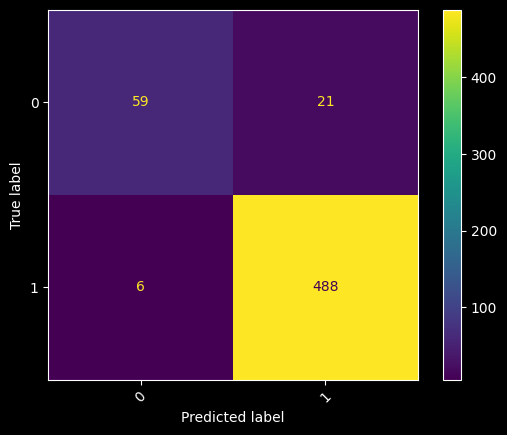

In [326]:
ConfusionMatrixDisplay.from_estimator(xgb_pipeline,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

In [322]:
rf_pipeline = Pipeline([
    ('final_pipeline', final_pipeline),
    ('Random Forest', RandomForestClassifier(random_state=42))
])

In [325]:
rf_pipeline.fit(X_train, y_train)

y_pred = rf_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9564459930313589
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        80
           1       0.96      0.99      0.98       494

    accuracy                           0.96       574
   macro avg       0.94      0.87      0.90       574
weighted avg       0.96      0.96      0.95       574



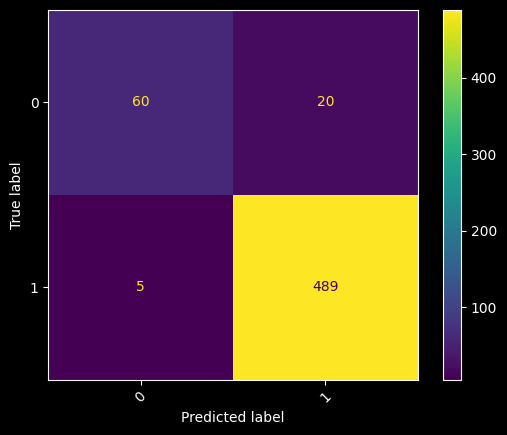

In [327]:
ConfusionMatrixDisplay.from_estimator(rf_pipeline,
                                       X_test,
                                       y_test,
                                       xticks_rotation=45
    );

## Save Models 

**Save xgb_pipeline model**

In [328]:
joblib.dump(xgb_pipeline, 'xgb_model.pkl')

['xgb_model.pkl']

**Save rf_pipeline model**

In [329]:
joblib.dump(rf_pipeline,'rf_pipeline.pkl')

['rf_pipeline.pkl']